# Gráfico de Barras con Líneas
Vamos a combinar un gráfico de barras con un gráfico de līneas.

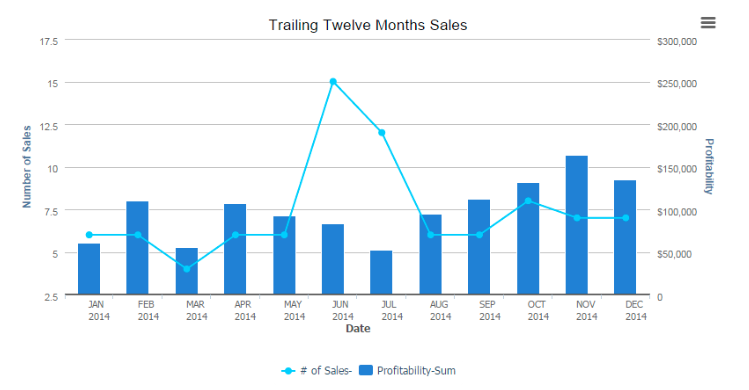

### Cuando utilizar
- Quiero comparar cambios de magnitudes de una variable a través del tiempo y añadir una segunda variable como un gráfico de líneas que tenga una escala diferente


### Consejos
- Los mismos consejos que el gráfico de barras y de līneas.
- Como consejo general, no recomiendo añadir mas de dos líneas al gráfico. Se volvería muy complejo de leer.


## En esta clase
### Datos
Información sobre paises por año: Expectativa de vida, Población y GDP per Capita
### Objetivos
1. Comparar la esperanza de vida promedio del mundo a lo largo de los años por continente y al mismo tiempo ver como ha cambiado la población del mundo en general.

## Referencias
- https://datavizcatalogue.com/methods/scatterplot.html
- https://chartio.com/learn/charts/what-is-a-scatter-plot/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
#sns.set_palette("colorblind")

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/paises_vida.csv', index_col='index')
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


In [3]:
# Eliminamos filas NaNs, agrupamos por año y por continente
df = df.dropna()
df_agrupado = df.groupby(['year', 'continent']).agg({
    'lifeExp': np.mean,
    'pop': np.sum,
    'gdpPercap': np.sum
})
df_agrupado = df_agrupado.reset_index()
df_agrupado

,year,continent,lifeExp,pop,gdpPercap
0,1952,Africa,39.135500,237640501,65133.768223
1,1952,Americas,53.279840,345152446,101976.563805
2,1952,Asia,46.314394,1395357351,171450.972133
3,1952,Europe,64.408500,418120846,169831.723043
4,1952,Oceania,69.255000,10686006,20596.171300
5,1957,Africa,41.266346,264837738,72032.275237
6,1957,Americas,55.960280,386953916,115401.093329
7,1957,Asia,49.318544,1562780599,190995.187018
8,1957,Europe,66.703067,437890351,208890.384478
9,1957,Oceania,70.295000,11941976,23197.044910


<AxesSubplot: xlabel='year', ylabel='lifeExp'>

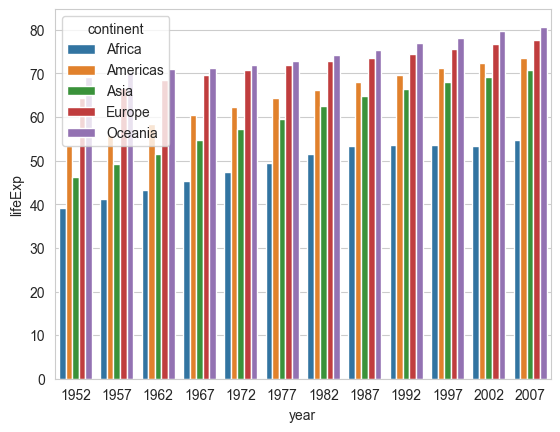

In [4]:
# Empecemos con el grafico de barras
sns.barplot(
    x='year',
    data=df_agrupado,
    y='lifeExp',
    hue='continent'
)

In [5]:
# Datos para el grafico de linea
df_agrupado_pop = df.groupby(['year']).agg({
    'pop': np.sum,
})
df_agrupado_pop = df_agrupado_pop.reset_index()
df_agrupado_pop

,year,pop
0,1952,2406957150
1,1957,2664404580
2,1962,2899782974
3,1967,3217478384
4,1972,3576977158
5,1977,3930045807
6,1982,4289436840
7,1987,4691477418
8,1992,5110710260
9,1997,5515204472


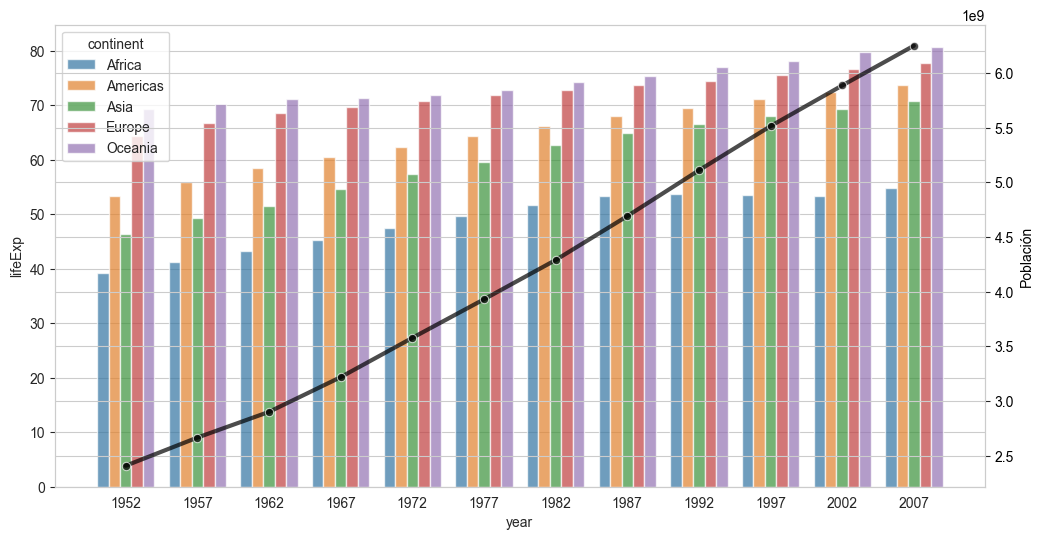

In [13]:

fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(
    data=df_agrupado,
    x='year',
    y='lifeExp',
    hue='continent',
    alpha=0.7,
    ax=ax1
)

ax2 = ax1.twinx()
line_color = 'black'
ax2.set_ylabel('Población', color=line_color)
sns.lineplot(
    data=df_agrupado_pop['pop'],
    alpha=0.7,
    marker='o',
    ax=ax2,
    linewidth=3,
    color=line_color
)
ax2.tick_params(axis='y', labelcolor=line_color)

plt.show()